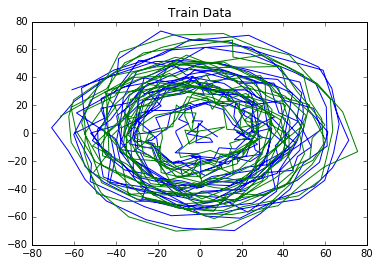

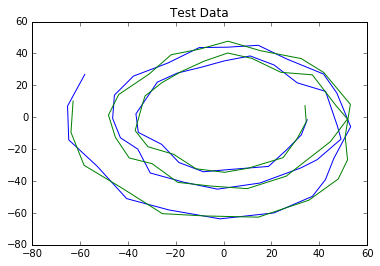

In [144]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from __future__ import division



# Load train and test data
X_tr = scipy.io.loadmat('train_data.mat')
X_test = scipy.io.loadmat('test_data.mat')

X = X_tr['X']
Z = X_tr['Z']

X_t = X_test['X']
Z_t = X_test['Z']

#Plot Train data
plt.figure(0)
plt.plot(X[:,[0]],X[:,[1]])
plt.plot(Z[:,[0]],Z[:,[1]])
plt.title('Train Data');

#Plot Test data
plt.figure(1)
plt.plot(X_t[:,[0]],X_t[:,[1]])
plt.plot(Z_t[:,[0]],Z_t[:,[1]])
plt.title('Test Data');


In [164]:
# X[:,[]]
print(X[:,1].shape)
X[0:-1,1].shape
X[0,:]

(450,)


array([ 8.39621116, -2.45452316])

In [168]:
#Closed form solution for A, W, H, Q

M = len(X)
# A = np.dot(X[0:-1,:], X[1:,:].T) / np.dot(X[0:-1,:], X[0:-1,:].T)
A = np.dot( X[1:,:].T, X[0:-1,:]) / np.dot(X[0:-1,:].T,X[0:-1,:])

W_1 = np.dot(X[1:,:].T, X[1:,:])
W_2 = np.dot( X[1:,:].T, X[0:-1,:])
W_0 = (1 / (M-1))
W = W_0 *( W_1 - (A * W_2))

H = np.dot( X[:,:].T, Z[:,:]) / np.dot( X[:,:].T, X[:,:])

Q_1 = np.dot(Z[:,:].T, Z[:,:])
Q_2 = np.dot(Z[:,:].T, X[:,:])
Q_0 = (1 /M)
Q = Q_0 *( Q_1 - (H * Q_2))
    
print('Size of A :' , A.shape)
print('Size of W :' ,W.shape)
print('Size of H :' ,H.shape)
print('Size of Q :' ,Q.shape)

    
    


('Size of A :', (2, 2))
('Size of W :', (2, 2))
('Size of H :', (2, 2))
('Size of Q :', (2, 2))


In [187]:
pk_ = np.eye(len(xk_))
np.dot(A, pk_).dot(A.T) + W
print(pk_)

[[ 1.  0.]
 [ 0.  1.]]


In [180]:
#Time and Measurement update

xk_ = Z[0,:]

pk_ = np.eye(len(xk_))
for index, X_ in enumerate(X, start=1):
    if(index < 10):
        xk = np.dot(A , xk_)
        pk = np.dot(np.dot(A, pk_), A.T) + W
        
        zk = Z[index,:]
        
        kk = np.dot(np.dot(pk, H), (H.dot(pk).dot(H.T) + Q).T)
        pk_ = np.dot((np.eye(len(xk_)) - np.dot(kk , H)), pk)
        
        xk_ = xk + np.dot(kk, zk - H.dot(xk))
        
        
        print('xk',xk)
        print('pk',pk)
        print('kk', kk)
        print('xk_',xk_)
        print('zk',zk)

('xk', array([  39.05498358,  106.27484831]))
('pk', array([[  3979.16408082,  17942.26788263],
       [ 16073.8552409 ,   3573.02869679]]))
('kk', array([[  1.47021234e+12,  -6.01983378e+12],
       [  4.19240788e+12,  -2.77079172e+12]]))
('xk_', array([  1.06657681e+16,   1.38011863e+16]))
('zk', array([-7.1252183 ,  2.28717013]))
('xk', array([  8.67580359e+17,  -6.14341031e+17]))
('pk', array([[  6.63595310e+21,  -7.12319157e+21],
       [ -1.10850978e+22,   4.24330341e+21]]))
('kk', array([[ -1.76914189e+48,  -1.61221998e+48],
       [  2.29827146e+48,   1.68416141e+48]]))
('xk_', array([  6.46370901e+67,  -7.45945798e+67]))
('zk', array([-4.90427671, -7.79713664]))
('xk', array([ -4.57458223e+69,  -3.87171436e+69]))
('pk', array([[  2.11599316e+75,   3.33779775e+75],
       [  1.80925410e+75,   2.70138316e+75]]))
('kk', array([[  1.92337663e+155,  -2.82582746e+155],
       [  1.58584026e+155,  -2.32839494e+155]]))
('xk_', array([ -5.31540911e+226,  -4.38066053e+226]))
('zk', arra